### Tingkat Kepercayaan Masyarakat terhadap Menteri Keuangan Baru Purbaya Yudhi Sadewa



### 1. Scraping Data
Scraping diambil dari komentar masyarakat di channel youtube KompasTV saat Menteri Purbaya melakukan rapat perdana dengan DPR

In [7]:
!pip install youtube-comment-downloader

In [16]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()

video_url = 'https://www.youtube.com/watch?v=hCRdLMChOzc'

comments = downloader.get_comments_from_url(video_url)


### 2. Case Folding


In [17]:
all_comments = []
for c in comments:
    all_comments.append(c['text'].lower())

# Buat DataFrame
df = pd.DataFrame(all_comments, columns=['komentar'])

# Simpan ke file CSV
df.to_csv('hasil_scraping_komentar.csv', index=False)

print("Hasil scraping telah disimpan di file 'hasil_scraping_komentar.csv'")

Hasil scraping telah disimpan di file 'hasil_scraping_komentar.csv'


### 3. Analisis kepuasan dengan dictionary sederhana

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

                                            komentar        sentimen
0  klo mau bikin uu hukuman mati bg kruptor psti ...  Kurang Percaya
1          pak dpr yang terhormat sadar diri nggak ?  Kurang Percaya
2  betul skrg masih baaanyak lembaga penddkan swa...  Kurang Percaya
3          heppy ya !!!! yg miskin masih banyak  woy  Kurang Percaya
4  ngomong segudang,suruh ngirit dirimu tuh ngaca...  Kurang Percaya

Jumlah komentar per sentimen:
sentimen
Kurang Percaya    1085
Percaya             40
Name: count, dtype: int64


/tmp/ipython-input-2120264290.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')


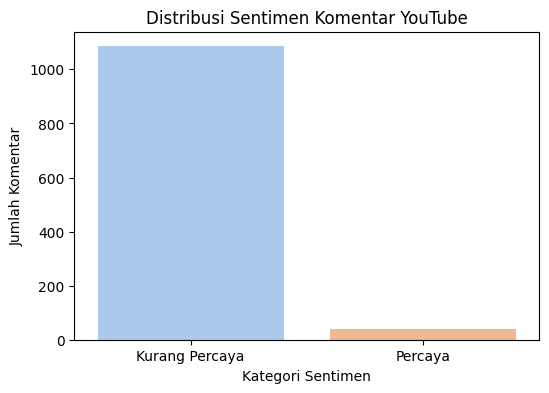

In [12]:
# Daftar kata positif dan negatif sederhana
percaya = ['baik', 'bagus', 'hebat', 'puas', 'mantap', 'percaya', 'optimis']
kurang_percaya = ['buruk', 'gagal', 'tidak', 'percaya', 'meragukan', 'parah', 'aneh', 'negatif']

# Fungsi analisis sentimen sederhana
def analisis_sentimen(teks):
    score = 0
    kata = teks.split()
    for word in kata:
        if word in percaya:
            score += 1
        elif word in kurang_percaya:
            score -= 1
    if score > 0:
        return 'Percaya'
    else:
        return 'Kurang Percaya'


# Terapkan analisis sentimen ke kolom komentar
df['sentimen'] = df['komentar'].apply(analisis_sentimen)

# Tampilkan hasil analisis (5 baris pertama)
print(df.head())

# Hitung jumlah tiap sentimen
sentimen_counts = df['sentimen'].value_counts()

print("\nJumlah komentar per sentimen:")
print(sentimen_counts)

# Visualisasi grafik distribusi sentimen
plt.figure(figsize=(6,4))
sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')
plt.title('Distribusi Sentimen Komentar YouTube')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.show()